# Packages

In [ ]:
import os
import matplotlib.pyplot as plt
import random
import shutil
import numpy as np
from PIL import Image
import tensorflow as tf
from skimage.io import imread, imshow
from skimage.transform import resize

In [ ]:
from os import listdir

#Dataset download

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fakhrealam9537/leaf-disease-segmentation-dataset")

print("Path to dataset files:", path)

100%|██████████| 503M/503M [00:07<00:00, 73.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4


In [ ]:
dataset_path="/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data"

In [ ]:
os.listdir(dataset_path)

['images', 'masks']

In [ ]:
image_dir=os.path.join(dataset_path, "images")
mask_dir=os.path.join(dataset_path, "masks")



------------------1-----------------------
/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/images/00455_0.jpg


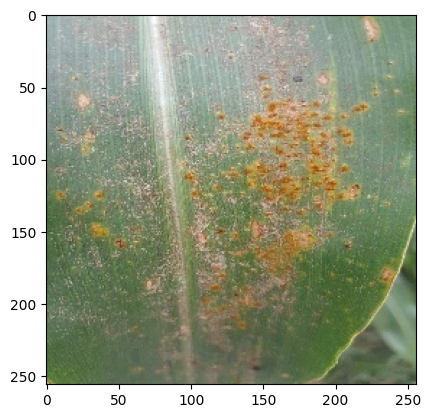

/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/masks/00455_0.png


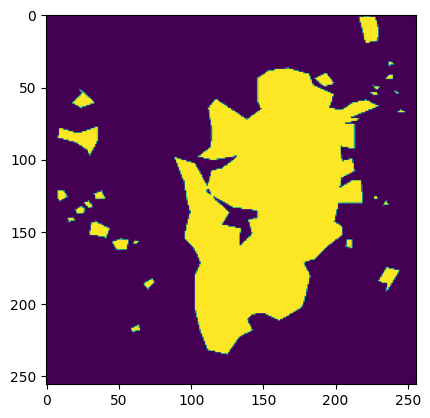



------------------2-----------------------
/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/images/00427_4.jpg


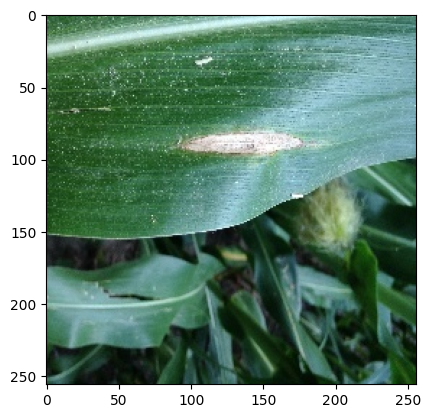

/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/masks/00427_4.png


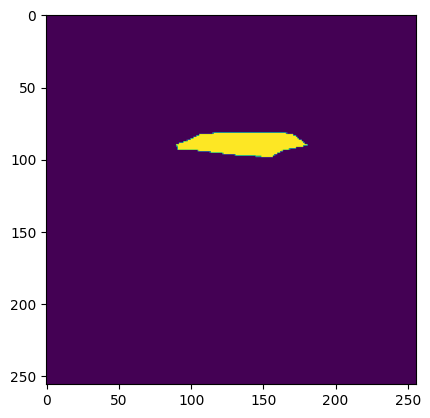



------------------3-----------------------
/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/images/00303_2.jpg


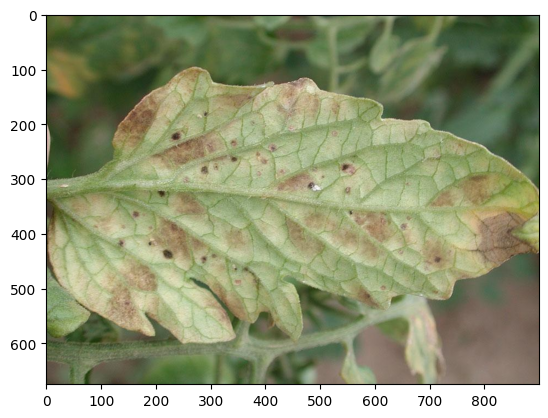

/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/masks/00303_2.png


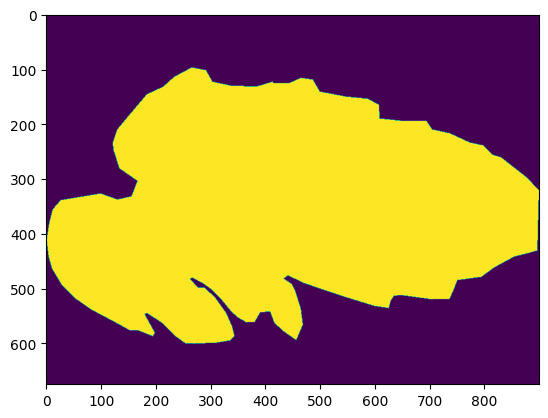



------------------4-----------------------
/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/images/00492_3.jpg


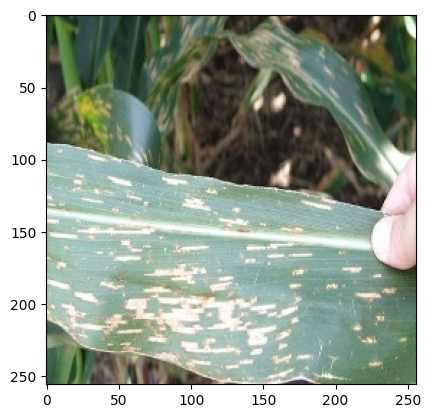

/root/.cache/kagglehub/datasets/fakhrealam9537/leaf-disease-segmentation-dataset/versions/4/aug_data/aug_data/masks/00492_3.png


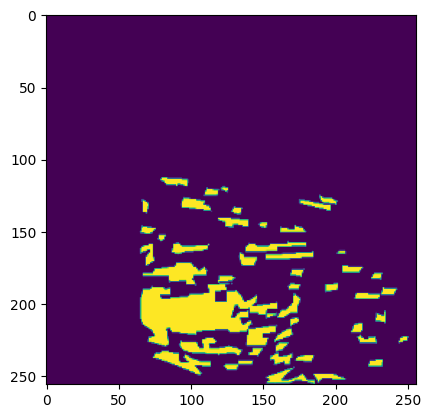

In [ ]:
#Display some images
for i in range(4):
  image_path=image_dir +'/'+os.listdir(image_dir)[i]
  mask_path=mask_dir +'/'+os.path.splitext(os.listdir(image_dir)[i])[0]+".png"


  image=Image.open(image_path)
  mask=Image.open(mask_path)

  print(f"\n\n------------------{i+1}-----------------------")
  print(image_path)
  plt.imshow(image)
  plt.show()


  print(mask_path)
  plt.imshow(mask)
  plt.show()


# Data Seperation

In [ ]:
train_images_dir=os.makedirs("train_images", exist_ok=True)
train_masks_dir=os.makedirs("train_masks", exist_ok=True)

In [ ]:
val_images_dir=os.makedirs("val_images", exist_ok=True)
val_masks_dir=os.makedirs("val_masks", exist_ok=True)

In [ ]:
test_images_dir=os.makedirs("test_images", exist_ok=True)
test_masks_dir=os.makedirs("test_masks", exist_ok=True)

In [ ]:
dataset_length=len(os.listdir(image_dir))
print(dataset_length)

2940


In [ ]:
train_images_number=int(dataset_length*0.6)
print("Number of images for train :",train_images_number)

Number of images for train : 1764


In [ ]:
val_images_number=int(dataset_length*0.2)
print("Number of images for validation :",val_images_number)

Number of images for validation : 588


In [ ]:
test_images_number=int(dataset_length*0.2)
print("Number of images for test :",test_images_number)

Number of images for test : 588


In [ ]:
# List all image and mask files
image_files = os.listdir(image_dir)
mask_files = os.listdir(mask_dir)

In [ ]:
#shuffle
random.shuffle(image_files)
random.shuffle(mask_files)

In [ ]:
image_files[0]

'00446_3.jpg'

In [ ]:
#copy images for train
for i in range(train_images_number):

  shutil.copy(os.path.join(image_dir, image_files[i]), "/content/train_images")
  shutil.copy(os.path.join(mask_dir, os.path.splitext(image_files[i])[0]+".png"),"/content/train_masks")

In [ ]:
len(os.listdir("/content/train_images"))
len(os.listdir("/content/train_masks"))

1764

In [ ]:
#copy images for val
for i in range(train_images_number, train_images_number + val_images_number):

  shutil.copy(os.path.join(image_dir, image_files[i]), "/content/val_images")
  shutil.copy(os.path.join(mask_dir, os.path.splitext(image_files[i])[0]+".png"),"/content/val_masks")

In [ ]:
len(os.listdir("/content/val_images"))
len(os.listdir("/content/val_masks"))

588

In [ ]:
#copy images for test
for i in range(train_images_number + val_images_number, train_images_number + 2*val_images_number): #because val images number = test images number

  shutil.copy(os.path.join(image_dir, image_files[i]), "/content/test_images")
  shutil.copy(os.path.join(mask_dir, os.path.splitext(image_files[i])[0]+".png"),"/content/test_masks")

In [ ]:
len(os.listdir("/content/test_images"))
len(os.listdir("/content/test_masks"))

588

# Preprocessing

In [ ]:
seed = 29
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [ ]:
#Train images
train_images = np.zeros((train_images_number, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)
train_masks = np.zeros((train_images_number, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

for i in range(train_images_number):

  #preprocessing about images
  image = np.array(Image.open(os.path.join("/content/train_images", os.listdir("/content/train_images")[i])).resize((128,128)))
  image = (image - 0) /255
  train_images[i] = image


  #preprocessing about masks
  mask=Image.open(os.path.join("/content/train_masks", os.path.splitext(os.listdir("/content/train_images")[i])[0]+".png"))
  mask = mask.point(lambda x: 255 if x > 0.5 else 0, '1')
  mask=mask.resize((128,128))
  mask=np.array(mask)
  mask= np.expand_dims(mask, axis=-1)
  mask = (mask - 0) /255
  train_masks[i] = mask


In [ ]:
#validation images
val_images = np.zeros((val_images_number, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)
val_masks = np.zeros((val_images_number, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

for i in range(val_images_number):

  #preprocessing about images
  image = np.array(Image.open(os.path.join("/content/val_images", os.listdir("/content/val_images")[i])).resize((128,128)))
  image = (image - 0) /255
  val_images[i] = image


  #preprocessing about masks
  mask=Image.open(os.path.join("/content/val_masks", os.path.splitext(os.listdir("/content/val_images")[i])[0]+".png"))
  mask = mask.point(lambda x: 255 if x > 0.5 else 0, '1')
  mask=mask.resize((128,128))
  mask=np.array(mask)
  mask= np.expand_dims(mask, axis=-1)
  mask = (mask - 0) /255
  val_masks[i] = mask


In [ ]:
#Train images
test_images = np.zeros((test_images_number, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float32)
test_masks = np.zeros((test_images_number, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

for i in range(test_images_number):

  #preprocessing about images
  image = np.array(Image.open(os.path.join("/content/test_images", os.listdir("/content/test_images")[i])).resize((128,128)))
  image = (image - 0) /255
  test_images[i] = image


  #preprocessing about masks
  mask=Image.open(os.path.join("/content/test_masks", os.path.splitext(os.listdir("/content/test_images")[i])[0]+".png"))
  mask = mask.point(lambda x: 255 if x > 0.5 else 0, '1')
  mask=mask.resize((128,128))
  mask=np.array(mask)
  mask= np.expand_dims(mask, axis=-1)
  mask = (mask - 0) /255
  test_masks[i] = mask


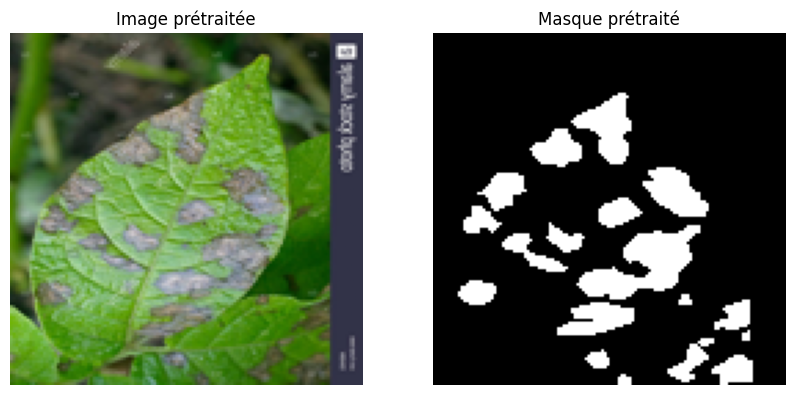

In [ ]:
i = 100
# Visualisation
plt.figure(figsize=(10, 5))

# image
plt.subplot(1, 2, 1)
plt.imshow(train_images[i])
plt.title("Image prétraitée")
plt.axis('off')

# mask
plt.subplot(1, 2, 2)
plt.imshow(train_masks[i].squeeze(), cmap='gray')
plt.title("Masque prétraité")
plt.axis('off')

plt.show()


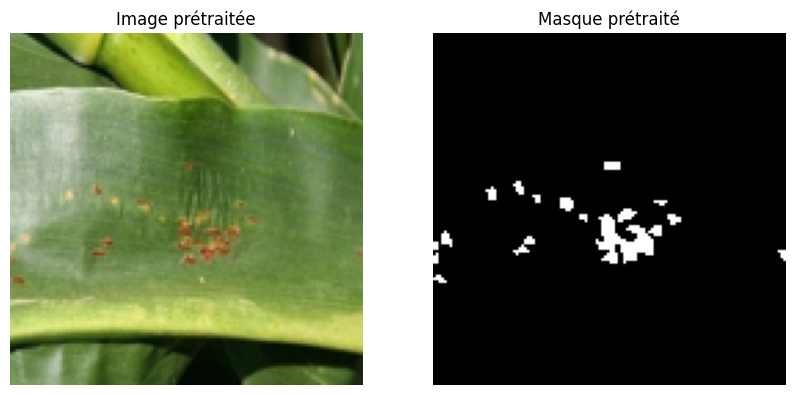

In [ ]:
i = 100
plt.figure(figsize=(10, 5))

# image
plt.subplot(1, 2, 1)
plt.imshow(val_images[i])
plt.title("Image prétraitée")
plt.axis('off')

# mask
plt.subplot(1, 2, 2)
plt.imshow(val_masks[i].squeeze(), cmap='gray')
plt.axis('off')

plt.show()


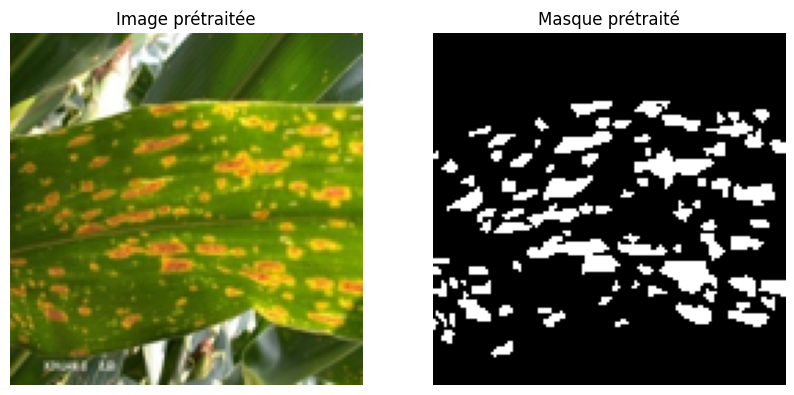

In [ ]:
i = 100
plt.figure(figsize=(10, 5))

# image
plt.subplot(1, 2, 1)
plt.imshow(test_images[i])
plt.title("Image prétraitée")
plt.axis('off')

# mask
plt.subplot(1, 2, 2)
plt.imshow(test_masks[i].squeeze(), cmap='gray')
plt.title("Masque prétraité")
plt.axis('off')

plt.show()


# Model Unet

In [ ]:
tf.random.set_seed(6)

In [ ]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

#Contraction
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
c1 = tf.keras.layers.Dropout(0.5)(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
c2 = tf.keras.layers.Dropout(0.5)(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
c3 = tf.keras.layers.Dropout(0.5)(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)
c4 = tf.keras.layers.Dropout(0.5)(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p4)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c5)
c5 = tf.keras.layers.Dropout(0.5)(c5)



#Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2))(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c6)
c6 = tf.keras.layers.Dropout(0.5)(c6)


u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2))(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c7)
c7 = tf.keras.layers.Dropout(0.5)(c7)


u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2))(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c8)
c8 = tf.keras.layers.Dropout(0.5)(c8)


u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2))(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(u9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c9)
c9 = tf.keras.layers.Dropout(0.5)(c9)


outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)


In [ ]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 16)   │          2,320 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128, 128, 16)   │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 16)     │              0 │ dropout[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 32)     │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 32)     │          9,248 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64, 64, 32)     │              0 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 32)     │              0 │ dropout_1[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 32, 32, 64)     │              0 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 64)     │              0 │ dropout_2[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 128)    │        147,584 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 16, 16, 128)    │              0 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 8, 8, 128)      │              0 │ dropout_3[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)    

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('Leaf_segmentation.keras', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [38]:
history = model.fit(train_images, train_masks,
                    batch_size=10,
                    epochs=20,
                    validation_data=(val_images, val_masks),
                    callbacks=callbacks)

Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.8426 - loss: 0.3501 - val_accuracy: 0.8719 - val_loss: 0.3075
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.8661 - loss: 0.3252 - val_accuracy: 0.8731 - val_loss: 0.2973
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - accuracy: 0.8743 - loss: 0.3101 - val_accuracy: 0.8762 - val_loss: 0.2915
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.8772 - loss: 0.3043 - val_accuracy: 0.8716 - val_loss: 0.2983
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.8800 - loss: 0.3008 - val_accuracy: 0.8761 - val_loss: 0.2916
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.8837 - loss: 0.2885 - val_accuracy: 0.8737 - val_loss: 0.2890
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.8867 - loss: 0.2809 - val_accuracy: 0.8827 - val_loss: 0.2741
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.8886 - loss: 0.2757 - val_accu

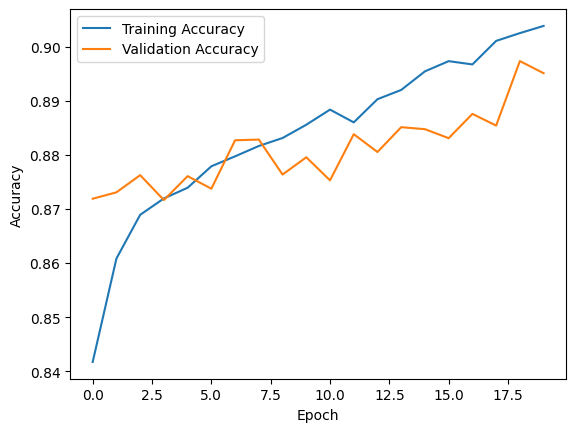

In [39]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
unetacc = history.history['accuracy'][-1]

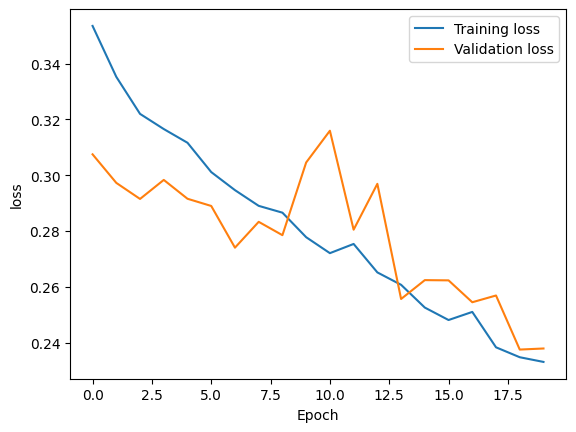

In [40]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
unetacc = history.history['loss'][-1]

In [41]:
#Evaluation
loss, metrics = model.evaluate(test_images, test_masks, batch_size=20)


30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 926ms/step - accuracy: 0.9004 - loss: 0.2348


In [ ]:
(loss, metrics)

In [46]:
# Save model
model.save('/content/drive/MyDrive/Perso_doosier/Leaf_segmentation.keras')


# prediction

In [65]:
def mask(img):
    image = Image.open(img)
    image = image.resize((128, 128))

    im = np.array(image)

    im = im / 255.0
    im = np.expand_dims(im, axis=0)

    mask = model.predict(im)

    mask = (mask > 0.5).astype(np.uint8)  # Convert to 0 or 1


    mask = np.squeeze(mask, axis=0)
    mask = np.squeeze(mask, axis=-1)

    image_mask = Image.fromarray(mask * 255)
    plt.imshow(image_mask)




## Graphe de prédiction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


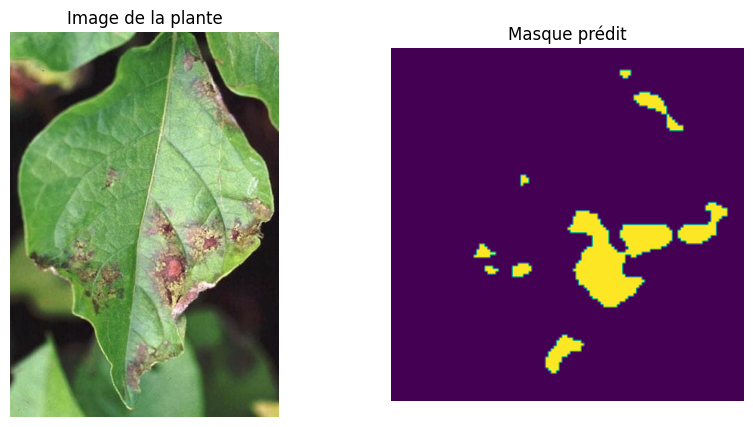

In [73]:
plt.figure(figsize=(10, 5))

# image
plt.subplot(1, 2, 1)
plt.imshow(Image.open("/content/test_images/00009_1.jpg"))
plt.title("Image de la plante")
plt.axis('off')

# Mask predicted
plt.subplot(1, 2, 2)  # 2ème position
mask("/content/test_images/00009_1.jpg")
plt.title("Masque prédit")
plt.axis('off')


plt.show()
